## Coding Exercise #0303

### 1. Descriptive statistics:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
# Read in the data.
df = pd.read_csv('data_studentlist.csv', header='infer')

print the shape of df

In [ ]:
df.shape

(17, 8)

display the first 5 lines of the data 

In [ ]:
df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


#### 1.1. Sample statistics:

In [ ]:
df['height'].isnull().sum()

0

calculate the mean of height

In [ ]:
mean=df['height'].mean()


Question : ge the unbiased estimator of the variance (i.e divided by $n-1$). (hint-1 : read the documentation of ``var`` )




hint-2 : A statistic d is called an unbiased estimator for a function of the parameter g(θ) provided that for every choice of θ, Eθd(X) = g(θ). Any estimator that not unbiased is called biased. The bias is the difference bd(θ) = Eθd(X) − g(θ). We can assess the quality of an estimator by computing its mean square error.

In statistics, the bias of an estimator is the difference between this estimator's expected value and the true value of the parameter being estimated. An estimator or decision rule with zero bias is called unbiased. In statistics, "bias" is an objective property of an estimator



Documentation:


https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/a/unbiased-estimate-of-population-variance


http://stat88.org/textbook/notebooks/Chapter_05/04_Unbiased_Estimators.html


In [ ]:
# Unbiased estimator of the variance.
var=(((df['height']-mean)**2).sum())/(df['height'].size-1)
var

61.61867647058827

Delta Degrees of Freedom: the divisor used in the calculation is N - ddof, where N represents the number of elements. By default, ddof is zero.

The mean is normally calculated as x.sum() / N, where N = len(x). If, however, ddof is specified, the divisor N - ddof is used instead.

In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of a hypothetical infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables.


Run the following code!! What is the difference between ddof=0 and ddof =1

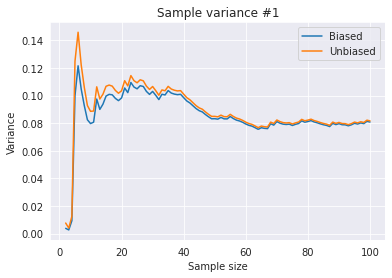

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

n = 100
rands = np.random.rand(n)
biased = []
unbiased = []
for i in range(2, n+1):
  biased.append(np.var(rands[:i], ddof=0))
  unbiased.append(np.var(rands[:i], ddof=1))

x = np.arange(2, n+1)
plt.plot(x, biased, label="Biased")
plt.plot(x, unbiased, label="Unbiased")
plt.xlabel("Sample size")
plt.ylabel("Variance")
plt.legend()
plt.title("Sample variance #1");

for small sample sizes, there is a difference between the two formulas (1 ddof and 0 ddof) but they converge to the same value as sample size increases

same as the above but with std 

In [ ]:
# Unbiased estimator of the standard deviation.
unbiased_var=np.var(df['height'],ddof=1)
unbiased_var
std=np.sqrt(unbiased_var)
std

7.849756459316956

In [ ]:
np.std(df['height'],ddof=1)

7.849756459316956

calculate the : mean , median , min and max of the ``height`` column

In [ ]:
# Median.
median=df['height'].median()
median

169.2

get the quantile at $alpha = 0.1$ (hint : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)

In [ ]:
# Quantile at alpha = 0.1
df.quantile(0.1)

age        21.00
grade       1.00
height    160.48
weight     47.82
Name: 0.1, dtype: float64

same as the above but with $alpha = 0.9$

In [ ]:
# Quantile at alpha = 0.9
df.quantile(0.9)

age        24.00
grade       4.00
height    179.10
weight     77.52
Name: 0.9, dtype: float64

#### 1.2. Boxplot: 

Documentation:

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review

Use what you've learned to calculate the inter quantile range using its forumla (hint : dataframe.quantile), and use the percentage 25% and 75%.

In [ ]:
# The Inter Quartile Range
IQR=df.quantile(.75)-df.quantile(.25)
IQR

age        1.0
grade      2.0
height    10.8
weight    15.2
dtype: float64

plot the box plot of ``height`` and ``weight`` using seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


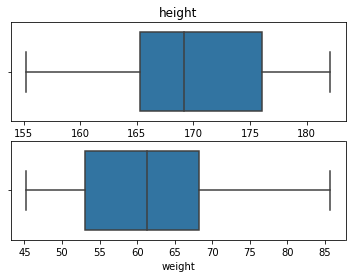

In [ ]:
# Show a Boxplot for the height.
import seaborn as sns
fig,axs=plt.subplots(nrows=2)
sns.boxplot('height',data=df,ax=axs[0])
axs[0].set_title('height')
sns.boxplot('weight',data=df,ax=axs[1])


#### 1.3. Covariance and Correlation:

Calculate the   covariance between  ``height`` and ``weight`` using ``cov`` function

In [ ]:
# Covariance.
np.cov(df['height'],df['weight'])

array([[ 61.61867647,  61.79069853],
       [ 61.79069853, 140.46242647]])

Calculate the   correlation between  ``height`` and ``weight``.

In [ ]:
np.corrcoef(df['height'],df['weight'])

array([[1.       , 0.6641816],
       [0.6641816, 1.       ]])

calculate the correlation between ``height`` and ``weight`` using the covariance between the two

the difference is due to the parameter ddof(delta degrees of freedom) of np.std() defaults to 0, while 1 is used in np.corrcoef()

In [ ]:
# Correlation.
np.cov(df['height'],df['weight'])/((np.std(df['height'],ddof=1))*(np.std(df['weight'],ddof=1)))

array([[0.66233255, 0.6641816 ],
       [0.6641816 , 1.50981557]])

same results for r(x,y) but not for r(x,x) or r(y,y)
because here we're calculating cov(x,y)/sigmax,sigmay

In [ ]:
# Calculate the correlation using the covariance.
# use the equation in the link : https://medium.com/analytics-vidhya/covariance-and-correlation-math-and-python-code-7cbef556baed


#### 1.4. Visualization:

show the relationship between ``weight`` and ``height`` ( find the appropriate plot to showcase the correlation between two numerical variables)

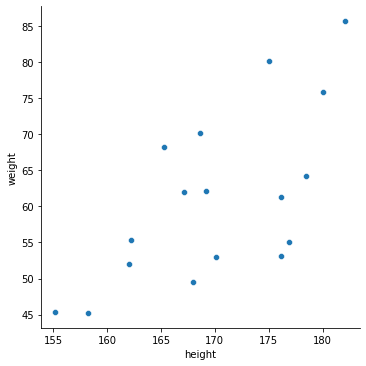

In [ ]:
# Visually inspect the relationship between X and Y.
sns.relplot(x='height',y='weight',data=df)

the goal of this last question is to seperate your dataset into male and female group. 
plot two overlapping scatter plots of these groups with different colors

**remark** : 

if you run the following code , you will get two different plots , find a way to mitigate this problem

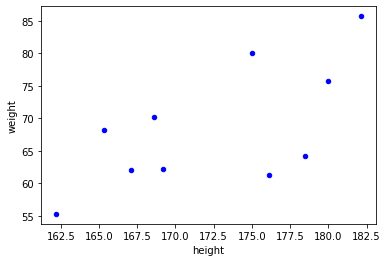

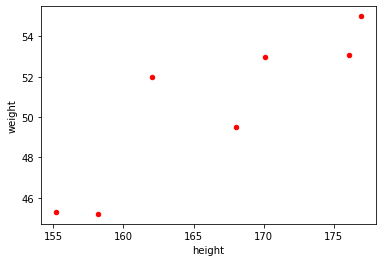

In [ ]:
# Visually inspect the relationship between X and Y.
# Distinguish the gender by color.
df[df.gender=='M'].plot.scatter(x='height', y='weight',color='blue',marker='o',s=20)
df[df.gender=='F'].plot.scatter(x='height', y='weight',color='red',marker='o',s=20)
plt.show()

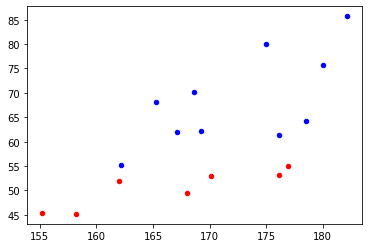

In [ ]:
plt.scatter(x=df[df.gender=='M']['height'],y=df[df.gender=='M']['weight'],color='blue',marker='o',s=20)
plt.scatter(x=df[df.gender=='F']['height'], y=df[df.gender=='F']['weight'],color='red',marker='o',s=20)

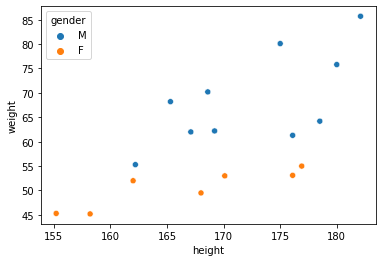

In [ ]:
sns.scatterplot(x='height',y='weight',data=df,hue='gender')